Run: 1, Generation: 1, Best Fitness: 14.926201207447104
Run: 1, Generation: 2, Best Fitness: 17.1851951706777
Run: 1, Generation: 3, Best Fitness: 19.519674035744913
Run: 1, Generation: 4, Best Fitness: 29.588355770383448
Run: 1, Generation: 5, Best Fitness: 40.48490174022092
Run: 1, Generation: 6, Best Fitness: 37.274176815696265
Run: 1, Generation: 7, Best Fitness: 47.53461964343228
Run: 1, Generation: 8, Best Fitness: 41.593178449504
Run: 1, Generation: 9, Best Fitness: 50.0622512204316
Run: 1, Generation: 10, Best Fitness: 49.655667291602285
Run: 1, Generation: 11, Best Fitness: 57.21329349249701
Run: 1, Generation: 12, Best Fitness: 60.169601569905055
Run: 1, Generation: 13, Best Fitness: 58.23124534318348
Run: 1, Generation: 14, Best Fitness: 64.66127011397396
Run: 1, Generation: 15, Best Fitness: 56.47346892015044
Run: 1, Generation: 16, Best Fitness: 65.44105024209638
Run: 1, Generation: 17, Best Fitness: 61.35262225718539
Run: 1, Generation: 18, Best Fitness: 73.649112523356
R

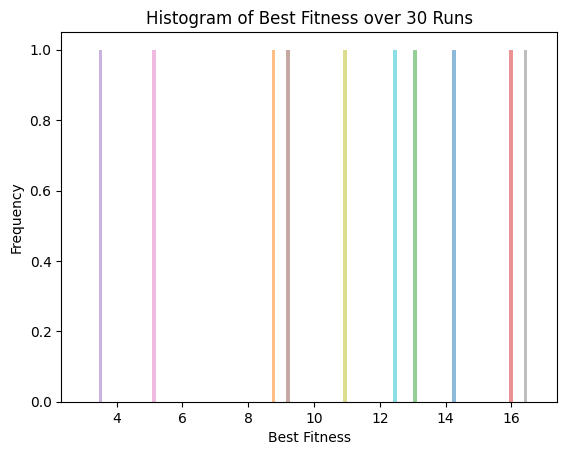

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, Label, Entry, Button, OptionMenu, StringVar

class GeneticAlgorithm:
    def __init__(self, pop_size=1000, dimensions=10, min_val=-5.12, max_val=5.12, num_generations=1000, mutation_rate=0.1, crossover_rate=0.8):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.min_val = min_val
        self.max_val = max_val
        self.num_generations = num_generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def rastrigin(self, x):
        A = 10
        return A * self.dimensions + np.sum(x**2 - A * np.cos(2 * np.pi * x))

    def initialize_population(self):
        return np.random.uniform(low=self.min_val, high=self.max_val, size=(self.pop_size, self.dimensions))

    @staticmethod
    def one_point_crossover(parents):
        crossover_point = np.random.randint(1, parents.shape[1])
        offspring = np.empty_like(parents)

        for i in range(parents.shape[0]):
            parent1_idx = i % parents.shape[0]
            parent2_idx = (i+1) % parents.shape[0]
            offspring[i, :crossover_point] = parents[parent1_idx, :crossover_point]
            offspring[i, crossover_point:] = parents[parent2_idx, crossover_point:]

        return offspring

    @staticmethod
    def two_point_crossover(parents):
        crossover_points = sorted(np.random.choice(parents.shape[1], 2, replace=False))
        offspring = np.empty_like(parents)

        for i in range(parents.shape[0]):
            parent1_idx = i % parents.shape[0]
            parent2_idx = (i+1) % parents.shape[0]
            offspring[i, :crossover_points[0]] = parents[parent1_idx, :crossover_points[0]]
            offspring[i, crossover_points[0]:crossover_points[1]] = parents[parent2_idx, crossover_points[0]:crossover_points[1]]
            offspring[i, crossover_points[1]:] = parents[parent1_idx, crossover_points[1]:]

        return offspring

    def n_point_crossover(self, parents, n=2):
        if n >= self.dimensions:
            n = self.dimensions - 1  # Ensure n is within valid range
        crossover_points = np.sort(np.random.choice(self.dimensions - 1, n, replace=False))
        offspring = np.empty_like(parents)

        for i in range(parents.shape[0]):
            for j in range(n):
                if j % 2 == 0:
                    start = crossover_points[j]
                    end = crossover_points[j + 1] if j + 1 < n else self.dimensions
                    offspring[i, start:end] = parents[i % 2, start:end]
                else:
                    start = crossover_points[j]
                    end = crossover_points[j + 1] if j + 1 < n else self.dimensions
                    offspring[i, start:end] = parents[(i + 1) % 2, start:end]

        return offspring

    def uniform_mutation(self, offspring):
        mask = np.random.random(size=offspring.shape) < self.mutation_rate
        mutation_amounts = np.random.uniform(low=-0.1, high=0.1, size=offspring.shape)
        offspring += mask * mutation_amounts
        return offspring

    def gaussian_mutation(self, offspring):
        mask = np.random.random(size=offspring.shape) < self.mutation_rate
        mutation_amounts = np.random.normal(loc=0, scale=0.1, size=offspring.shape)
        offspring += mask * mutation_amounts
        return offspring

    def bitflip_mutation(self, offspring):
        mask = np.random.random(size=offspring.shape) < self.mutation_rate
        offspring[mask] = 1 - offspring[mask]
        return offspring

    def roulette_wheel_selection(self, population, fitness):
        probabilities = fitness / np.sum(fitness)
        selected_indices = np.random.choice(len(fitness), size=len(fitness), p=probabilities)
        return population[selected_indices], selected_indices

    def tournament_selection(self, population, fitness, tournament_size=2):
        selected_indices = []
        for _ in range(len(fitness)):
            tournament_indices = np.random.choice(len(fitness), size=tournament_size, replace=False)
            tournament_fitness = fitness[tournament_indices]
            selected_indices.append(tournament_indices[np.argmin(tournament_fitness)])
        return population[selected_indices], selected_indices

    def evolve(self, mutation_method, crossover_method, parent_selection_method, survivor_selection_method, run):
        population = self.initialize_population()
        best_fitnesses = []
        selected_indices_history = []

        for generation in range(self.num_generations):
            fitness = np.apply_along_axis(self.rastrigin, 1, population)
            best_fitness = np.min(fitness)
            best_fitnesses.append(best_fitness)

            parents, selected_indices = parent_selection_method(population, fitness)
            offspring_crossover = crossover_method(parents)
            offspring_mutation = mutation_method(offspring_crossover)

            population = survivor_selection_method(population, offspring_mutation, fitness)
            selected_indices_history.append(selected_indices)

            # Print only run number and best fitness
            print(f"Run: {run+1}, Generation: {generation + 1}, Best Fitness: {best_fitness}")

        return best_fitnesses, selected_indices_history

def copy_population(population, offspring, fitness):
    return np.copy(offspring)

def run_genetic_algorithm(pop_size, dimensions, min_val, max_val, num_generations, mutation_rate, crossover_rate, num_runs, selected_methods):
    ga = GeneticAlgorithm(pop_size, dimensions, min_val, max_val, num_generations, mutation_rate, crossover_rate)

    mutation_methods = {
        "Bitflip Mutation": ga.bitflip_mutation,
        "Gaussian Mutation": ga.gaussian_mutation,
        "Uniform Mutation": ga.uniform_mutation
    }

    crossover_methods = {
        "One-Point Crossover": ga.one_point_crossover,
        "Two-Point Crossover": ga.two_point_crossover,
        "N-Point Crossover": ga.n_point_crossover
    }

    parent_selection_methods = {
        "Roulette Wheel Selection": ga.roulette_wheel_selection,
        "Tournament Selection": ga.tournament_selection
    }

    survivor_selection_methods = {
        "Copy Population": copy_population,
        "Copy Population": copy_population
    }

    if selected_methods[0] in mutation_methods:
        mutation_method = mutation_methods[selected_methods[0]]
    else:
        mutation_method = None

    if selected_methods[1] in crossover_methods:
        crossover_method = crossover_methods[selected_methods[1]]
    else:
        crossover_method = None

    if selected_methods[2] in parent_selection_methods:
        parent_selection_method = parent_selection_methods[selected_methods[2]]
    else:
        parent_selection_method = None

    if selected_methods[3] in survivor_selection_methods:
        survivor_selection_method = survivor_selection_methods[selected_methods[3]]
    else:
        survivor_selection_method = None

    if None in [mutation_method, crossover_method, parent_selection_method, survivor_selection_method]:
        print("Please select a method for all options.")
        return

    global_min_fitness = float('inf')
    best_solution = None

    results = []

    for run in range(num_runs):
        best_fitnesses_list = []  # Initialize best_fitnesses_list here
        best_fitnesses, _ = ga.evolve(mutation_method, crossover_method, parent_selection_method, survivor_selection_method, run)
        best_fitness = min(best_fitnesses)
        best_fitnesses_list.append(best_fitness)  # Append the best fitness for each run
        if best_fitness < global_min_fitness:
            global_min_fitness = best_fitness
            best_solution = ga.initialize_population()[np.argmin(best_fitnesses)]
        print(f"Run: {run+1}, Best Fitness: {best_fitness}")

        results.append(best_fitnesses_list)

    print(f"Best Solution: {best_solution}, Best Fitness Overall: {global_min_fitness}")

    plt.hist(results, bins=10, alpha=0.5)
    plt.xlabel('Best Fitness')
    plt.ylabel('Frequency')
    plt.title('Histogram of Best Fitness over 30 Runs')
    plt.show()

class GeneticAlgorithmGUI:
    def __init__(self, master):
        self.master = master
        master.title("Genetic Algorithm")

        self.pop_size_label = Label(master, text="Population Size:")
        self.pop_size_label.grid(row=0, column=0)
        self.pop_size_entry = Entry(master)
        self.pop_size_entry.grid(row=0, column=1)

        self.dimensions_label = Label(master, text="Dimensions:")
        self.dimensions_label.grid(row=1, column=0)
        self.dimensions_entry = Entry(master)
        self.dimensions_entry.grid(row=1, column=1)

        self.min_val_label = Label(master, text="Minimum Value:")
        self.min_val_label.grid(row=2, column=0)
        self.min_val_entry = Entry(master)
        self.min_val_entry.grid(row=2, column=1)

        self.max_val_label = Label(master, text="Maximum Value:")
        self.max_val_label.grid(row=3, column=0)
        self.max_val_entry = Entry(master)
        self.max_val_entry.grid(row=3, column=1)

        self.num_generations_label = Label(master, text="Number of Generations:")
        self.num_generations_label.grid(row=4, column=0)
        self.num_generations_entry = Entry(master)
        self.num_generations_entry.grid(row=4, column=1)

        self.mutation_rate_label = Label(master, text="Mutation Rate:")
        self.mutation_rate_label.grid(row=5, column=0)
        self.mutation_rate_entry = Entry(master)
        self.mutation_rate_entry.grid(row=5, column=1)

        self.crossover_rate_label = Label(master, text="Crossover Rate:")
        self.crossover_rate_label.grid(row=6, column=0)
        self.crossover_rate_entry = Entry(master)
        self.crossover_rate_entry.grid(row=6, column=1)

        self.num_runs_label = Label(master, text="Number of Runs:")
        self.num_runs_label.grid(row=7, column=0)
        self.num_runs_entry = Entry(master)
        self.num_runs_entry.grid(row=7, column=1)

        self.mutation_label = Label(master, text="Mutation Method:")
        self.mutation_label.grid(row=8, column=0)
        self.mutation_var = StringVar(master)
        self.mutation_var.set("Select")
        self.mutation_menu = OptionMenu(master, self.mutation_var, *["Select", "Bitflip Mutation", "Gaussian Mutation", "Uniform Mutation"])
        self.mutation_menu.grid(row=8, column=1)

        self.crossover_label = Label(master, text="Crossover Method:")
        self.crossover_label.grid(row=9, column=0)
        self.crossover_var = StringVar(master)
        self.crossover_var.set("Select")
        self.crossover_menu = OptionMenu(master, self.crossover_var, *["Select", "One-Point Crossover", "Two-Point Crossover", "N-Point Crossover"])
        self.crossover_menu.grid(row=9, column=1)

        self.parent_selection_label = Label(master, text="Parent Selection Method:")
        self.parent_selection_label.grid(row=10, column=0)
        self.parent_selection_var = StringVar(master)
        self.parent_selection_var.set("Select")
        self.parent_selection_menu = OptionMenu(master, self.parent_selection_var, *["Select", "Roulette Wheel Selection", "Tournament Selection"])
        self.parent_selection_menu.grid(row=10, column=1)

        self.survivor_selection_label = Label(master, text="Survivor Selection Method:")
        self.survivor_selection_label.grid(row=11, column=0)
        self.survivor_selection_var = StringVar(master)
        self.survivor_selection_var.set("Select")
        self.survivor_selection_menu = OptionMenu(master, self.survivor_selection_var, *["Select", "Copy Population", "Copy Population"])
        self.survivor_selection_menu.grid(row=11, column=1)

        self.run_button = Button(master, text="Run Genetic Algorithm", command=self.run_algorithm)
        self.run_button.grid(row=12, columnspan=2)

    def run_algorithm(self):
        pop_size = int(self.pop_size_entry.get())
        dimensions = int(self.dimensions_entry.get())
        min_val = float(self.min_val_entry.get())
        max_val = float(self.max_val_entry.get())
        num_generations = int(self.num_generations_entry.get())
        mutation_rate = float(self.mutation_rate_entry.get())
        crossover_rate = float(self.crossover_rate_entry.get())
        num_runs = int(self.num_runs_entry.get())

        selected_methods = [
            self.mutation_var.get(),
            self.crossover_var.get(),
            self.parent_selection_var.get(),
            self.survivor_selection_var.get()
        ]

        run_genetic_algorithm(pop_size, dimensions, min_val, max_val, num_generations, mutation_rate, crossover_rate, num_runs, selected_methods)

if __name__ == "__main__":
    root = Tk()
    app = GeneticAlgorithmGUI(root)
    root.mainloop()
